# Research Questions

## RQ1: How does the numeric rating/score of reviews affect the booking rates of listings?

## RQ2: How does the sentiment and language used in Airbnb text reviews correlate with booking rate?

## RQ3: Can the frequency and quality of host responses (time) predict the likelihood of repeat or future bookings?

- handle missing values (henry)
- coorelation analysis (Brandon)
- histogram/scatterplot for some key variables 
- summary stats (nawal)


1) If your research questions have been updated from the proposal. What's your new research questions?
2) Describe if your methodology has been updated since milestone 1 (proposal) and how. 
3) Describe your current results, e.g., finding from data exploration, answer to research questions 1. 
4) Update the member contribution section based on progress so far.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Replace 'your_dataset.csv' with the path to your CSV file
file_path = './raw-dataset/toronto_listings.csv' 

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Output the first 5 rows of the DataFrame
df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20240214201029,2024-02-15,previous scrape,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.06
1,8077,https://www.airbnb.com/rooms/8077,20240214201029,2024-02-15,previous scrape,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,...,4.90,4.92,4.83,NaN,f,2,1,1,0,0.96
2,26654,https://www.airbnb.com/rooms/26654,20240214201029,2024-02-15,city scrape,"World Class @ CN Tower, convention centre, The...","CN Tower, TIFF Bell Lightbox, Metro Convention...",There's a reason they call it the Entertainmen...,https://a0.muscache.com/pictures/81811785/5dcd...,113345,...,4.76,4.86,4.67,NaN,f,5,5,0,0,0.26
3,307726,https://www.airbnb.com/rooms/307726,20240214201029,2024-02-15,previous scrape,Boutique Chic at Maple Leaf Square,This is a private studio condo (no separate be...,Our condo is situated in the SOCO district of ...,https://a0.muscache.com/pictures/100fe901-bb9c...,1108156,...,4.98,4.98,4.86,NaN,f,2,2,0,0,0.45
4,314459,https://www.airbnb.com/rooms/314459,20240214201029,2024-02-15,previous scrape,Cosy room by Toronto's Danforth Ave,Cosy room available for female travellers in 1...,The neighbourhood is leafy and lovely and very...,https://a0.muscache.com/pictures/64761885/18b6...,1615944,...,5.00,4.94,4.92,NaN,f,1,0,1,0,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20625,1087814100531125546,https://www.airbnb.com/rooms/1087814100531125546,20240214201029,2024-02-15,city scrape,Modern Midtown Toronto Escape,"As you step inside, you'll be greeted by a bri...","Along St. Clair Avenue West, you'll find a ran...",https://a0.muscache.com/pictures/miso/Hosting-...,538892755,...,NaN,NaN,NaN,NaN,f,7,7,0,0,NaN
20626,1087860408281149022,https://www.airbnb.com/rooms/1087860408281149022,20240214201029,2024-02-15,city scrape,Upscale & Modern 2BR+2BA 2 Beds Sleeps 5!,"Fully inclusive prime location modern condo, s...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,561248375,...,NaN,NaN,NaN,STR-2402-FKKDVP,t,1,1,0,0,NaN
20627,1087958772761373280,https://www.airbnb.com/rooms/1087958772761373280,20240214201029,2024-02-15,city scrape,Downtown 3-Story Exec Townhouse - Free Parking!,Welcome to my downtown Toronto townhouse!<br /...,Furnished Townhome in the trendy Trinity Bellw...,https://a0.muscache.com/pictures/prohost-api/H...,561026004,...,NaN,NaN,NaN,STR-2310-HLXBHX,t,1,1,0,0,NaN
20628,1087969820288570243,https://www.airbnb.com/rooms/1087969820288570243,20240214201029,2024-02-15,city scrape,Fully furnished XL bachelor unit,448 square feet unit<br />It has direct elevat...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,5201716,...,NaN,NaN,NaN,STR-2402-GPPXVT,f,1,1,0,0,NaN


(20630, 75)
(8361, 75)
(39202, 75)
(91778, 75)
(25480, 75)
(511139, 6)
(378989, 6)
(986810, 6)
(1649190, 6)
(560773, 6)


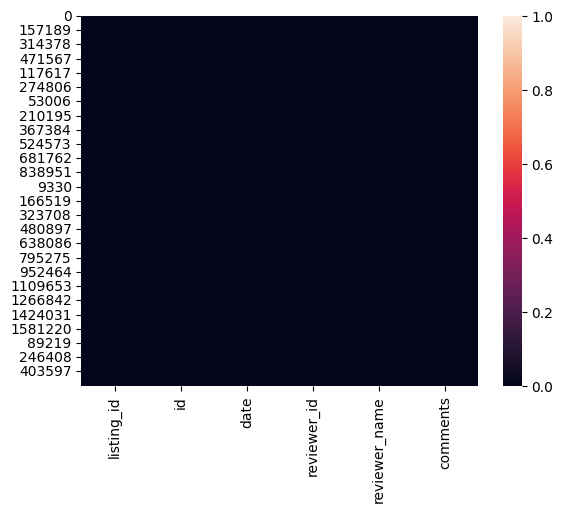

In [3]:
def combine_data(source_folder_name="raw-dataset"):
    
    locations = ['toronto','sanfran','nyc','london','sydney']
    types = ['listings', 'reviews']

    global listings, reviews
    listings = pd.DataFrame()
    reviews = pd.DataFrame()

    for t in types:
        
        data = []
        for l in locations:
            filename = f"./{source_folder_name}/{l}_{t}.csv"
            d = pd.read_csv(filename)
            data.append(d)
            print(d.shape)

        if t == 'listings':
            listings = pd.concat(data)

        if t == 'reviews':
            reviews = pd.concat(data)

def visualize_missing_values(df):
    sns.heatmap(df.isnull())
    
combine_data()

visualize_missing_values(reviews)


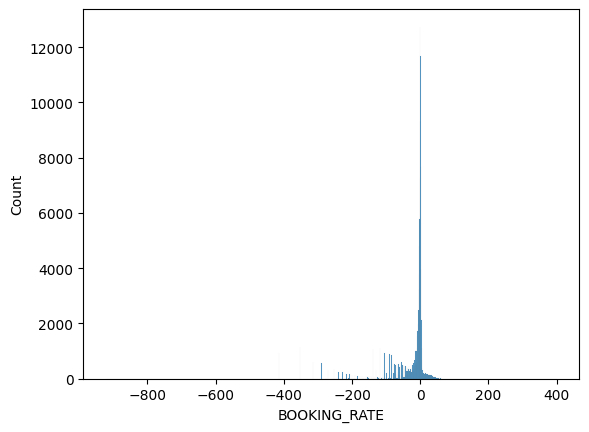

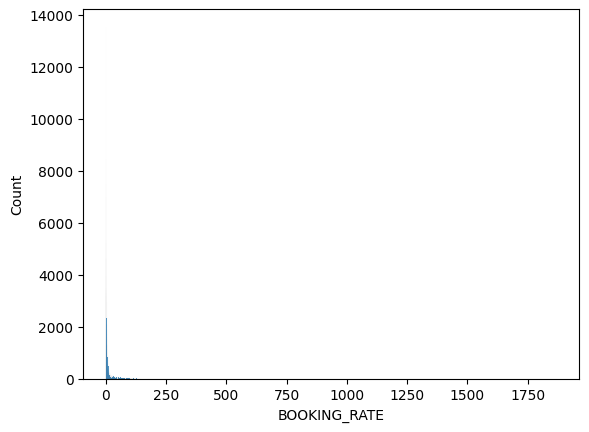

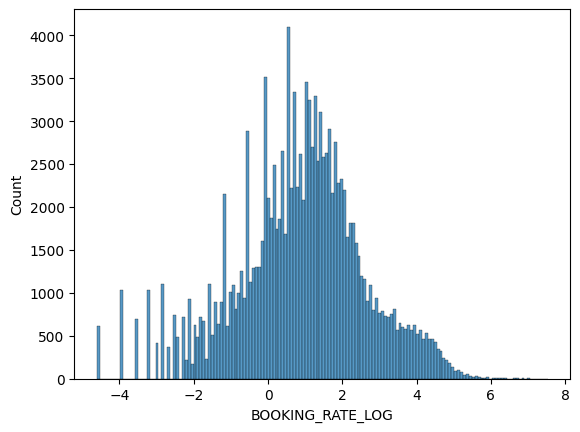

In [4]:
short_term_listings = listings[listings['minimum_nights_avg_ntm'] < 100]
short_term_listings = short_term_listings[short_term_listings['reviews_per_month'] < 20]


short_term_listings['BOOKING_RATE'] = short_term_listings['minimum_nights'] * np.log(short_term_listings['reviews_per_month'])
# sns.histplot(short_term_listings['reviews_per_month'])
sns.histplot(short_term_listings['BOOKING_RATE'])
plt.show()



# WITHOUT LOG

listings['BOOKING_RATE'] = listings['minimum_nights'] * listings['reviews_per_month']
sns.histplot(listings['BOOKING_RATE'])
plt.show()

# listings['BOOKING_RATE'] = listings['minimum_nights_avg_ntm'] * listings['reviews_per_month']

# WITH LOG
listings['BOOKING_RATE_LOG'] = np.log(listings['minimum_nights'] * listings['reviews_per_month'])
sns.histplot(listings['BOOKING_RATE_LOG'])
plt.show()


ValueError: cannot reindex on an axis with duplicate labels

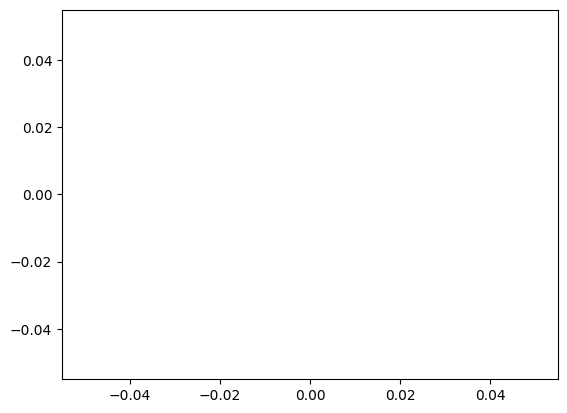

In [19]:
sns.scatterplot(data=listings, x='review_scores_rating', y='BOOKING_RATE_LOG')
# plt.scatter(listings['review_scores_rating'], listings['BOOKING_RATE_LOG'])
plt.show()

In [ ]:
#display the first few rows of the df
print(df.head())

#Check missing values
print(df.isnull().sum())

#basic statistics of the data
print(df.describe())


       id                          listing_url       scrape_id last_scraped  \
0    1419    https://www.airbnb.com/rooms/1419  20240214201029   2024-02-15   
1    8077    https://www.airbnb.com/rooms/8077  20240214201029   2024-02-15   
2   26654   https://www.airbnb.com/rooms/26654  20240214201029   2024-02-15   
3  307726  https://www.airbnb.com/rooms/307726  20240214201029   2024-02-15   
4  314459  https://www.airbnb.com/rooms/314459  20240214201029   2024-02-15   

            source                                               name  \
0  previous scrape                    Beautiful home in amazing area!   
1  previous scrape                 Downtown Harbourfront Private Room   
2      city scrape  World Class @ CN Tower, convention centre, The...   
3  previous scrape                 Boutique Chic at Maple Leaf Square   
4  previous scrape                Cosy room by Toronto's Danforth Ave   

                                         description  \
0  This large, family home is 

In [5]:
# List of column names you want to include in the correlation analysis
columns_to_include = ['accommodates', 'beds', 'minimum_nights', 'maximum_nights', 
                        'availability_30', 'availability_60', 'availability_90', 
                        'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
                        'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy',
                        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                        'review_scores_location', 'review_scores_value']

# Select only the specified columns
df_selected = df[columns_to_include]

# Now compute the correlation matrix for the selected columns
correlation_matrix = df_selected.corr()
print(correlation_matrix)

                             accommodates      beds  minimum_nights  \
accommodates                     1.000000  0.790662       -0.046046   
beds                             0.790662  1.000000       -0.035665   
minimum_nights                  -0.046046 -0.035665        1.000000   
maximum_nights                  -0.010002  0.001679        0.144152   
availability_30                  0.056705  0.009511        0.019609   
availability_60                  0.047564 -0.004791        0.006834   
availability_90                  0.043574 -0.008522        0.000936   
availability_365                 0.036159  0.011246        0.058037   
number_of_reviews                0.006720 -0.007280       -0.083865   
number_of_reviews_ltm            0.040172  0.012013       -0.216063   
number_of_reviews_l30d           0.007757 -0.030386       -0.160420   
review_scores_rating             0.013127  0.015575       -0.032042   
review_scores_accuracy           0.007285  0.008058       -0.023416   
review

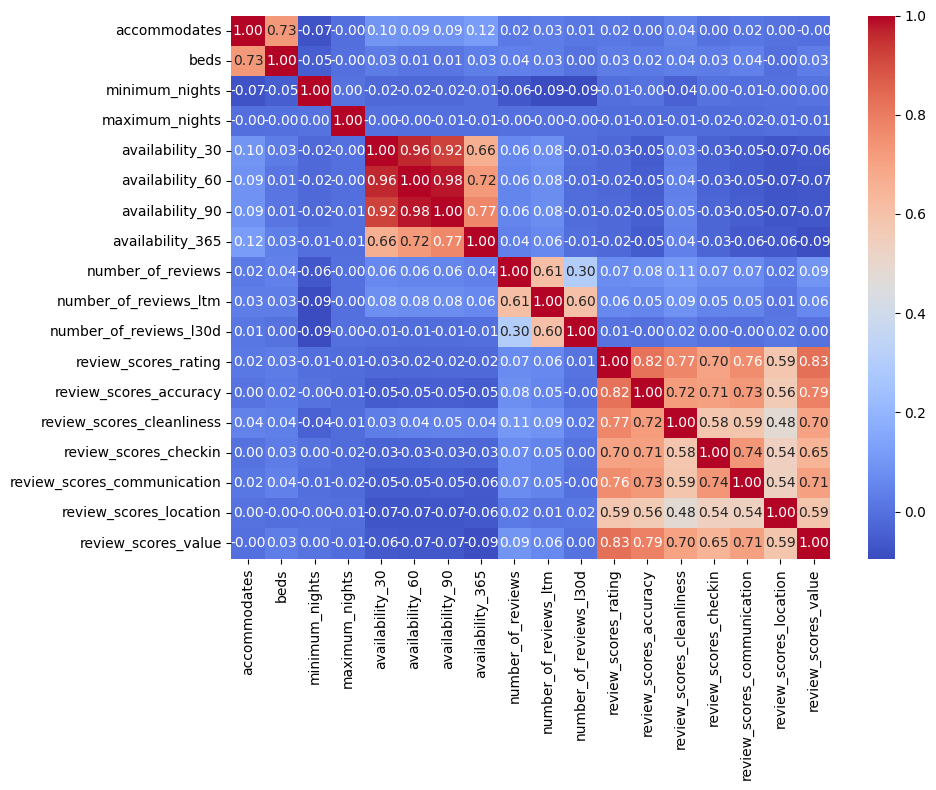

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.tight_layout()
plt.show()

KeyError: 'minimum_miimum_nights'

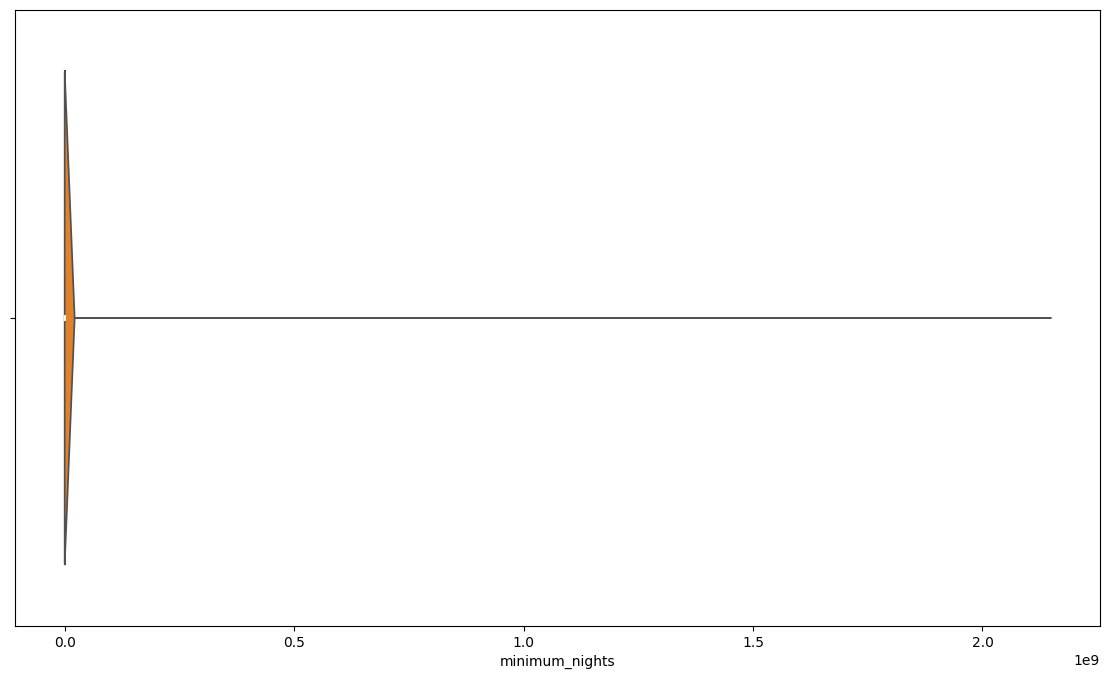

In [ ]:
# # plt.scatter(listings['review_scores_rating'],listings['availability_365'])

# f, axes = plt.subplots(8,1, figsize=(20,20))
# # features = [f"availability_{dur}" for dur in [30, 60, 90, 365]]
# features = [
#     'minimum_nights', 
#     'maximum_nights', 
#     'minimum_minimum_nights', 
#     'maximum_minimum_nights', 
#     'minimum_maximum_nights', 
#     'maximum_maximum_nights',
#     'minimum_nights_avg_ntm',
#     'maximum_nights_avg_ntm',
# ]

# # for i,feat in enumerate(features):
# #     print(i//4, i%4)
# #     sns.violinplot(data=listings, y=feat, ax=axes[i])

# sns.violinplot(data=listings, x=features[2])
# # plt.show()

# features = [
#     'minimum_nights', 
#     'maximum_nights', 
#     'minimum_minimum_nights', 
#     'maximum_minimum_nights', 
#     'minimum_maximum_nights', 
#     'maximum_maximum_nights',
#     'minimum_nights_avg_ntm',
#     'maximum_nights_avg_ntm',
# ]

# # Adjust the number of subplots and their layout


# plt.figure(figsize=(14, 8))  # Adjust the figure size if needed

# for feature in features:
#     sns.violinplot(x=listings[feature])
    
# plt.title('Violin Plots of Important Variables')

# plt.show()



<Axes: ylabel='minimum_nights_avg_ntm'>

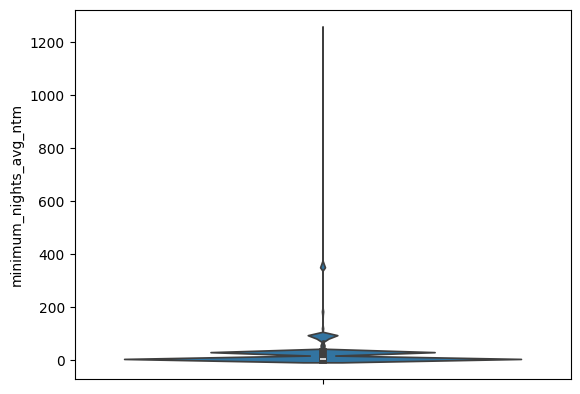

In [ ]:
sns.violinplot(listings['minimum_nights_avg_ntm'])

In [28]:
def get_full_summary(df, exclude_columns=None):
    
    if exclude_columns is None:
        exclude_columns = []
    
    # Exclude specified columns
    df_filtered = df.drop(columns=exclude_columns)
    
    # Numeric summary using describe() for numeric columns, updated include parameter
    numeric_summary = df_filtered.describe(include='number')
    
    # Adding median to numeric summary. Adjusting the method for potential compatibility issues
    try:
        median = df_filtered.median(numeric_only=True).to_frame().T.rename(index={0: 'median'})
    except TypeError:  # In case of unexpected TypeError, fall back to excluding non-numeric
        median = df_filtered.select_dtypes(include='number').median().to_frame().T.rename(index={0: 'median'})
    
    numeric_summary = pd.concat([numeric_summary, median], axis=0)

    # Categorical summary using describe() for categorical columns, excluding specified columns
    categorical_summary = df_filtered.describe(exclude='number')
    
    return {'numeric_summary': numeric_summary, 'categorical_summary': categorical_summary}


# Specify columns to exclude
exclude_columns = ['id', 'listing_url', 'scrape_id', 'host_id', 'host_url', 
                       'host_thumbnail_url', 'host_picture_url', 'name', 'description', 
                       'neighborhood_overview', 'host_about', 'amenities', 'bathrooms_text', 
                       'last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 
                       'last_review', 'source', 'host_neighbourhood', 'calendar_updated', 'license', 'picture_url']
full_summary = get_full_summary(reviews, None)

print("Numeric Summary:")
print(full_summary['numeric_summary'])
print("\nCategorical Summary:")
print(full_summary['categorical_summary'])

Numeric Summary:
          listing_id            id   reviewer_id
count   4.086901e+06  4.086901e+06  4.086901e+06
mean    1.286849e+17  4.104130e+17  1.519084e+08
std     2.878550e+17  4.130155e+17  1.484143e+08
min     9.580000e+02  1.981000e+03  1.000000e+00
25%     1.102017e+07  3.438002e+08  3.152565e+07
50%     2.462662e+07  4.497724e+17  9.911354e+07
75%     4.834545e+07  8.276150e+17  2.318731e+08
max     1.073350e+18  1.087798e+18  5.601695e+08
median  2.462662e+07  4.497724e+17  9.911354e+07

Categorical Summary:
              date reviewer_name comments
count      4086901       4086895  4086253
unique        5121        320756  3915471
top     2023-07-09         David        .
freq          6929         31661     5322


In [ ]:
def plot_histograms(df, column1, column2):
  
    # Set up the matplotlib figure and axes for two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot the first column histogram
    df[column1].hist(ax=axes[0], bins=20, color='skyblue', edgecolor='black')
    axes[0].set_title(f'Histogram of {column1}')
    axes[0].set_xlabel(column1)
    axes[0].set_ylabel('Frequency')
    
    # Plot the second column histogram
    df[column2].hist(ax=axes[1], bins=20, color='lightgreen', edgecolor='black')
    axes[1].set_title(f'Histogram of {column2}')
    axes[1].set_xlabel(column2)
    axes[1].set_ylabel('Frequency')
    
    # Ensure the layout is not too tight
    plt.tight_layout()
    
    # Display the plots
    plt.show()



In [6]:
import pandas as pd

def analyze_data_cleaning_needs(df):
    """
    Analyze a CSV file for common data cleaning needs.
    
    Args:
    csv_file_path (str): The path to the CSV file.
    
    Returns:
    dict: A summary of findings including missing values, data types, duplicates, and potential outliers.
    """
    
    # Initialize the analysis dictionary
    analysis = {
        "missing_values": df.isnull().sum(),
        "data_types": df.dtypes,
        "duplicate_rows": df.duplicated().sum(),
        "potential_outliers": {}
    }
    
    # Check for potential outliers using IQR
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outlier_count = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].shape[0]
        if outlier_count > 0:
            analysis["potential_outliers"][column] = outlier_count
            
    return analysis

analyze_data_cleaning_needs(listings)

{'missing_values': id                                                  0
 listing_url                                         0
 scrape_id                                           0
 last_scraped                                        0
 source                                              0
                                                 ...  
 calculated_host_listings_count_private_rooms        0
 calculated_host_listings_count_shared_rooms         0
 reviews_per_month                               50425
 BOOKING_RATE                                    50425
 BOOKING_RATE_LOG                                50425
 Length: 77, dtype: int64,
 'data_types': id                                                int64
 listing_url                                      object
 scrape_id                                         int64
 last_scraped                                     object
 source                                           object
                                                  .

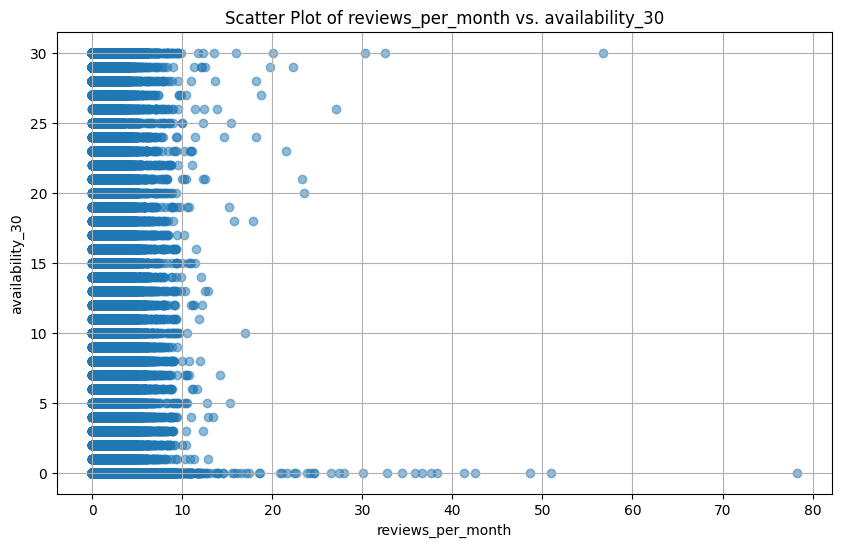

In [ ]:
def plot_scatter(df, column_x, column_y):
  
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.scatter(df[column_x], df[column_y], alpha=0.5)  # Create scatter plot with some transparency
    plt.title(f'Scatter Plot of {column_x} vs. {column_y}')  # Set the title of the plot
    plt.xlabel(column_x)  # Set the x-axis label
    plt.ylabel(column_y)  # Set the y-axis label
    plt.grid(True)  # Add a grid for better readability
    plt.show()  # Display the plot

plot_scatter(listings, 'reviews_per_month', 'availability_30')


In [7]:
#aggregate scores togther 
# Filter out the relevant score columns
score_columns = [
    'review_scores_rating', 
    'review_scores_accuracy', 
    'review_scores_cleanliness', 
    'review_scores_checkin', 
    'review_scores_communication', 
    'review_scores_location', 
    'review_scores_value'
]

# Create a new DataFrame with only the score columns
scores_df = df[score_columns]

# Calculate the average score for each listing
# replace NaN with the column mean (considering only non-missing values for each score)
scores_df.fillna(scores_df.mean(), inplace=True)

# Calculate the aggregated score as the mean across the columns for each row
df['aggregated_score'] = scores_df.mean(axis=1)

# Inspect the new DataFrame with the aggregated score
print(df[['id', 'aggregated_score']].head())


       id  aggregated_score
0    1419          5.000000
1    8077          4.865714
2   26654          4.757143
3  307726          4.934286
4  314459          4.940000


/var/folders/kc/mhm2kh_d3hsgh6c30kfnwmhw0000gn/T/ipykernel_79931/4198025612.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_df.fillna(scores_df.mean(), inplace=True)


In [ ]:
print(df[[
    'review_scores_rating', 
    'review_scores_accuracy', 
    'review_scores_cleanliness', 
    'review_scores_checkin', 
    'review_scores_communication', 
    'review_scores_location', 
    'review_scores_value'
]])

       review_scores_rating  review_scores_accuracy  \
0                      2.00                    2.00   
1                      4.89                    5.00   
2                       NaN                     NaN   
3                      4.74                    4.78   
4                       NaN                     NaN   
...                     ...                     ...   
39197                   NaN                     NaN   
39198                   NaN                     NaN   
39199                   NaN                     NaN   
39200                  4.69                    4.72   
39201                  3.80                    4.20   

       review_scores_cleanliness  review_scores_checkin  \
0                           1.00                   4.00   
1                           4.72                   4.94   
2                            NaN                    NaN   
3                           4.71                   4.93   
4                            NaN            

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Let's assume 'df' is your DataFrame and it has been loaded with your dataset
# Replace 'your_dataframe' with the actual variable name of your DataFrame

# Replace the column names with the actual column names from your DataFrame
dependent_var = 'BOOKING_RATE_LOG'
independent_vars = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]

listings_withReviews = listings.dropna(subset=independent_vars + [dependent_var])

# Split the data into independent X and dependent y variables
X = listings_withReviews[independent_vars]
y = listings_withReviews[dependent_var]

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model with the training data
model.fit(X_train, y_train)

# Predict the booking rates with the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the model evaluation
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the regression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
print(lr.summary())

Mean Squared Error (MSE): 3.0536341260212843
R-squared (R2 ): 0.016112766978150894
                            OLS Regression Results                            
Dep. Variable:       BOOKING_RATE_LOG   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     264.4
Date:                Fri, 19 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:55:00   Log-Likelihood:            -2.1260e+05
No. Observations:              107912   AIC:                         4.252e+05
Df Residuals:                  107904   BIC:                         4.253e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [ ]:
dependent_var = 'BOOKING_RATE_LOG'
independent_vars = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]


In [11]:
#RQ2 

import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from langdetect import detect
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('stopwords')
nltk.download('wordnet')

def combine_data(source_folder_name="raw-dataset"):
    locations = ['toronto', 'sanfran', 'nyc', 'london', 'sydney']
    types = ['listings', 'reviews']
    global listings, reviews
    listings = pd.DataFrame()
    reviews = pd.DataFrame()

    for t in types:
        data = []
        for l in locations:
            filename = f"./{source_folder_name}/{l}_{t}.csv"
            d = pd.read_csv(filename)
            data.append(d)

        if t == 'listings':
            listings = pd.concat(data)
        if t == 'reviews':
            reviews = pd.concat(data)

combine_data()

# After combining, immediately calculate the booking rate log
listings['BOOKING_RATE_LOG'] = np.log(listings['minimum_nights'] * listings['reviews_per_month'] + 1)  # +1 to avoid log(0)

# Count reviews for each listing
review_counts = reviews['listing_id'].value_counts()

# Get the IDs of listings with between 100 and 300 reviews
listings_with_100_to_300_reviews = review_counts[(review_counts >= 100) & (review_counts <= 300)].index

# Randomly sample 10,000 listing IDs (or all available if less than 10,000)
random_sample_listings = np.random.choice(listings_with_100_to_300_reviews, size=min(10000, len(listings_with_100_to_300_reviews)), replace=False)

# Filter reviews for these listing IDs
reviews_for_sampled_listings = reviews[reviews['listing_id'].isin(random_sample_listings)]

# Function to sample 5 reviews per listing
def sample_20_reviews(group):
    return group.sample(n=20, replace=False)  # Ensure sampling without replacement

# Apply the function to each group of listing reviews
sampled_reviews = reviews_for_sampled_listings.groupby('listing_id').apply(sample_20_reviews).reset_index(drop=True)

# Print the number of sampled listings and reviews
print(f"Number of sampled listings: {len(random_sample_listings)}")
print(f"Total number of sampled reviews: {len(sampled_reviews)}")
pled_reviews = reviews_for_sampled_listings.groupby('listing_id').apply(sample_20_reviews).reset_index(drop=True)

# Store unique listing IDs
sampled_listing_ids = set(sampled_reviews['listing_id'].unique())
print(f"Stored {len(sampled_listing_ids)} unique listing IDs for later use.")

# Define a function to preprocess text data
def preprocess_text(text):
    try:
        if detect(text) != 'en':
            return None
    except:
        return None
    lower_text = text.lower()
    clean_text = ''.join([char for char in lower_text if char not in string.punctuation and not char.isdigit()])
    words = clean_text.split()
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply preprocessing to each review
sampled_reviews['processed_comments'] = sampled_reviews['comments'].apply(preprocess_text)
sampled_reviews.dropna(subset=['processed_comments'], inplace=True)

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    if text is None:
        return 0
    return sia.polarity_scores(text)['compound']

sampled_reviews['sentiment_score'] = sampled_reviews['processed_comments'].apply(get_sentiment)

# Calculate average sentiment for each listing
average_sentiment = sampled_reviews.groupby('listing_id')['sentiment_score'].mean().reset_index()
average_sentiment.columns = ['listing_id', 'average_sentiment']

# Merge average sentiment with listings data
listings_with_sentiment = pd.merge(listings, average_sentiment, left_on='id', right_on='listing_id', how='inner')

def categorize_sentiment(score):
    if score <= -0.6:
        return 'High Negative'
    elif score <= -0.2:
        return 'Negative'
    elif score < 0.2:
        return 'Neutral'
    elif score < 0.6:
        return 'Positive'
    else:
        return 'High Positive'

# Apply the categorization function to your sentiment scores
listings_with_sentiment['sentiment_category'] = listings_with_sentiment['average_sentiment'].apply(categorize_sentiment)

# Correlation calculation
correlation = listings_with_sentiment[['average_sentiment', 'BOOKING_RATE_LOG']].corr()
print(correlation)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nawalhaque/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nawalhaque/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Number of sampled listings: 8900
Total number of sampled reviews: 178000
Stored 8900 unique listing IDs for later use.
                   average_sentiment  BOOKING_RATE_LOG
average_sentiment           1.000000         -0.016589
BOOKING_RATE_LOG           -0.016589          1.000000


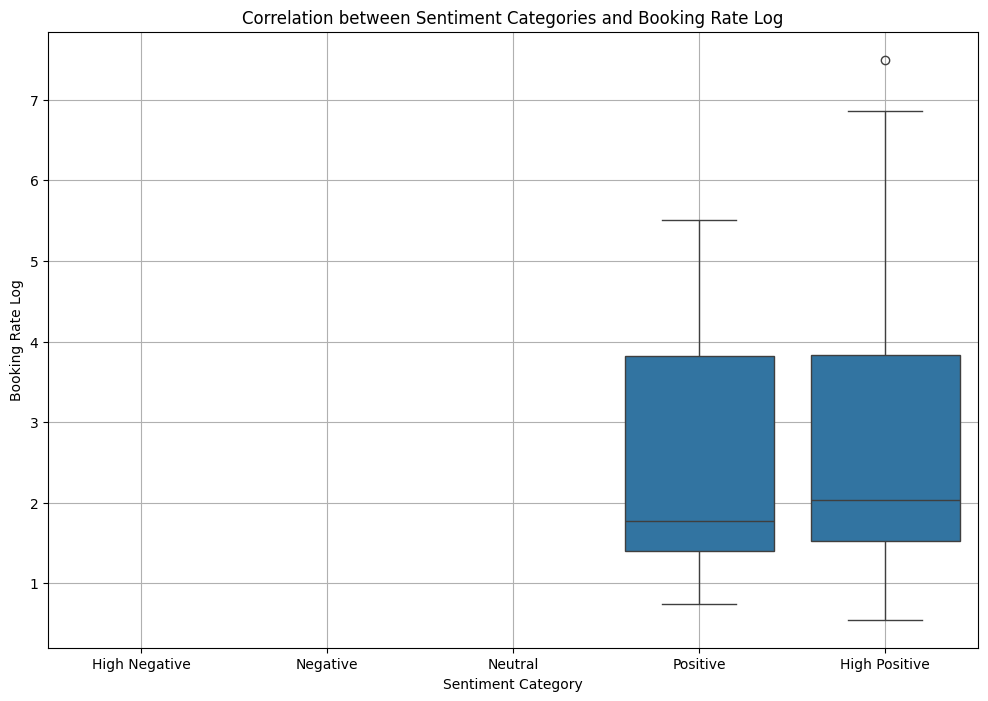

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a categorical scatter plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='sentiment_category', y='BOOKING_RATE_LOG', data=listings_with_sentiment, order=['High Negative', 'Negative', 'Neutral', 'Positive', 'High Positive'])
plt.title('Correlation between Sentiment Categories and Booking Rate Log')
plt.xlabel('Sentiment Category')
plt.ylabel('Booking Rate Log')
plt.grid(True)
plt.show()



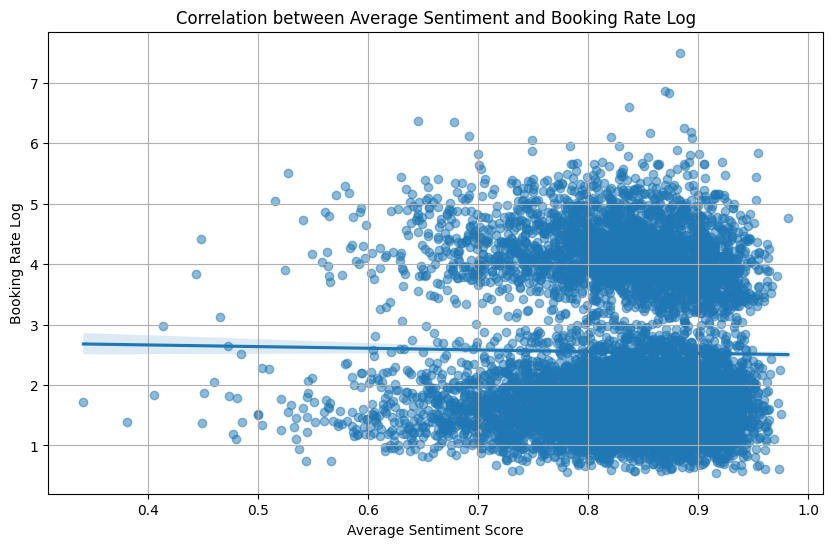

In [13]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='average_sentiment', y='BOOKING_RATE_LOG', data=listings_with_sentiment, scatter_kws={'alpha':0.5})
plt.title('Correlation between Average Sentiment and Booking Rate Log')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Booking Rate Log')
plt.grid(True)
plt.show()

In [16]:
# After sampling the listing IDs
print(f"Number of sampled listings: {len(random_sample_listings)}")

# Apply the function to each group of listing reviews
sampled_reviews = reviews_for_sampled_listings.groupby('listing_id').apply(sample_20_reviews).reset_index(drop=True)

# Print the number of reviews that will be used moving forward
print(f"Total number of reviews moving forward: {len(sampled_reviews)}")


Number of sampled listings: 8900
Total number of reviews moving forward: 178000


In [8]:
#checking sentiment accuracy 

import pandas as pd

# Function to sample 3 reviews from each category if available
def sample_reviews(group):
    return group.sample(n=min(3, len(group)), random_state=42)  # Using a random_state for reproducibility

# Group by 'sentiment_category' and apply the sampling function
sampled_by_category = sampled_reviews.groupby('sentiment_category').apply(sample_reviews)

# Drop the multi-index created by groupby if necessary
sampled_by_category.reset_index(drop=True, inplace=True)

# Print the sampled reviews for each category
for category in sampled_by_category['sentiment_category'].unique():
    print(f"\nCategory: {category}")
    for review in sampled_by_category[sampled_by_category['sentiment_category'] == category]['comments']:
        print(f"- {review}")



Category: High Negative
- he keeps calling and harassing me i had to call the cops guys a real creep with hidden security cameras i found and left the house and he threatening me now so i cal cops
<br/>There was no garden, just gravel and two dead shrubs.nky, the bedroom chair was broken.....se it at all.room on a couch that folded out to a mattress on the floor. The worst part was that there are no blinds in the room, just a sheer curtain, and she was clearly visible at night from the road and bus stop.The couches were so uncomfortable we could not sit on them.
- My partner and I were very displeased with the services and cleanliness during our week in a half stay. Basic hotel hygiene & cleanliness etiquette was not met. Despite calling and speaking to room service multiple times. <br/>1. Floors were dirty & dusty within minutes walking the floor, our white socks turned black<br/>2. Bed sheets were not replaced despite calling house keeping<br/>3. Room service did not come on days we